In [124]:
#ספריות
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
import math
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import shap


In [125]:
#קריאת הדאטה
url = r"C:\Users\motiw\Desktop\תעשייה וניהול\machine learning 2\Public_Libraries.csv"
df = pd.read_csv(url)
df.head()

,Fiscal Year,Library,County,Principal Public?,AENGLC Rank,Population of Service Area,Total Library Visits,Library Visits Per Capita Served,Total Registered Borrowers,Percent of Residents with Library Cards,...,Total Collection,Collection Per Capita Served,Total Operating Income,Operating Income Per Capita,Town Tax Appropriation for Library,Tax Appropriation Per Capita Served,Library Materials Expenditures,Wages & Salaries Expenditures,Operating Expenditures,Operating Expenditures Per Capita
0,1996,Andover,Tolland,P,109.0,2815.0,15000.0,5.3,1313.0,0.47,...,15285.0,5.4,56300.0,20.00,52915.0,18.80,10073.0,30996.0,44290.0,15.7
1,1996,Ansonia,New Haven,P,158.0,17825.0,91756.0,5.1,6952.0,0.39,...,63685.0,3.6,320679.0,17.99,323503.0,18.15,45874.0,201621.0,270658.0,15.2
2,1996,Ashford-Babcock,Windham,P,131.0,3969.0,8665.0,2.2,1360.0,0.34,...,23818.0,6.0,111699.0,28.14,106713.0,26.89,11508.0,62295.0,82769.0,20.9
3,1996,Avon,Hartford,P,19.0,14143.0,162893.0,11.5,8808.0,0.62,...,74903.0,5.3,685678.0,48.48,602831.0,42.62,92711.0,340400.0,516583.0,36.5
4,1996,Beacon Falls,New Haven,P,129.0,5351.0,7000.0,1.3,1379.0,0.26,...,10042.0,1.9,40806.0,7.63,39256.0,7.34,4298.0,21585.0,39165.0,7.3


In [126]:
df.shape

(5105, 29)

In [127]:
df['Library'].value_counts()

Andover                         28
Ridgefield                      28
Plainville                      28
Plymouth - Terryville           28
Pomfret                         28
                                ..
Plainfield - Central Village     1
Litchfield - Gilbert             1
Pomfret - Abington               1
East Windsor - Broad             1
Derby-Derby Neck                 1
Name: Library, Length: 208, dtype: int64

In [128]:
df['Library'].value_counts()[150:]

Marlborough-Richmond            28
Meriden                         28
Haddam - Brainerd               28
Litchfield - OWL                28
Groton - Mystic                 28
Groton - Bill                   28
Groton                          28
Essex                           28
Fairfield                       28
Griswold - Slater               28
Greenwich                       28
Granby                          28
Farmington                      28
Goshen                          28
Newtown - Cyr.Booth             27
Greenwich - Perrot              27
Ansonia                         27
Essex - Ivoryton                24
Fairfield - Pequot              23
Norwalk - Rowayton              20
Berlin Free                     19
Franklin - Janet Carlson        18
East Haddam - Rathbun           17
Woodstock - May                 16
Newington - LucyWelles          14
Glastonbury - Welles-T.         14
Derby Neck                      14
Berlin - East Berlin            14
Glastonbury - East  


נסנן את כל הספריות שיש להן פחות מ28 רשומות.
כמו כן במהלך החקר שמנו לב שיש מעט מאוד ספריות שאחראיות על רוב הערכים החסרים לכן נשמיט אותן גם

In [129]:
# ספריות לבדיקה
libraries_to_remove = [
    "Hartland",
    "Windham - Guilford Sm",
    "Essex - Ivoryton",
    "Ridgefield",
    "Groton - Mystic",
    "Branford - Willoughby",
    "Groton - Bill",
    "Greenwich - Perrot",
    'Norwalk - Rowayton',
    'Fairfield - Pequot'
]

# חישוב סך הערכים החסרים בדאטה
total_missing_values = df.isnull().sum().sum()

# חישוב סך הערכים החסרים עבור הספריות שברשימה
missing_values_in_specified_libraries = df[df['Library'].isin(libraries_to_remove)].isnull().sum().sum()

# חישוב סך הערכים החסרים עבור ספריות עם פחות מ-28 רשומות
missing_values_in_libraries_with_less_than_28_records = df.groupby('Library').filter(lambda x: len(x) < 28).isnull().sum().sum()

# הצגת התוצאות
print(f"Total missing values in the dataset: {total_missing_values}")
print(f"Missing values in specified libraries: {missing_values_in_specified_libraries}")
print(f"Missing values in libraries with less than 28 records: {missing_values_in_libraries_with_less_than_28_records}")


Total missing values in the dataset: 10768
Missing values in specified libraries: 1179
Missing values in libraries with less than 28 records: 2848


In [130]:
# סינון ספריות עם פחות מ-20 רשומות
df = df.groupby('Library').filter(lambda x: len(x) >= 27)

# רשימת הספריות למחיקה
libraries_to_remove = [
    "Hartland",
    "Windham - Guilford Sm",
    "Essex - Ivoryton",
    "Ridgefield",
    "Groton - Mystic",
    "Branford - Willoughby",
    "Groton - Bill",
    "Greenwich - Perrot",
    'Norwalk - Rowayton',
    'Fairfield - Pequot'
]

# סינון הספריות
df = df[~df['Library'].isin(libraries_to_remove)]

In [131]:
df.isnull().sum()

Fiscal Year                                              0
Library                                                  0
County                                                   0
Principal Public?                                        0
AENGLC Rank                                              1
Population of Service Area                               1
Total Library Visits                                   151
Library Visits Per Capita Served                       151
Total Registered Borrowers                              38
Percent of Residents with Library Cards                 36
Registrations Per Capita Served                       4478
Reference Questions                                    230
Reference Questions Per Capita Served                  233
Total Circulation                                        8
Circulation Per Capita Served                            8
Total Programs (Synchronous + Prerecorded)              53
Total Program Attendance & Views                        

 מחיקת עמודות בעלי אחוז ערכים חסרים גבוהה ועמודות שאנו לא יודעים לפרש את משמעותן

In [132]:
df = df.drop(columns=['Registrations Per Capita Served','Reference Questions Per Capita Served','Reference Questions','Use of Public Internet Computers'])

#שורה שכולה נתונים לא נכונים
df = df[~((df['Library'] == 'Woodstock - Bracken') & (df['Fiscal Year'] == 2000))]

חלורקת הדאטה

In [133]:
# שלב 1: חלוקת הנתונים
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

סידור הספריות לפי שם ושנה

In [134]:
# סידור ה-Train לפי שם הספרייה ולאחר מכן לפי השנה
train_df = train_df.sort_values(by=['Library', 'Fiscal Year'], ascending=[True, True])

# סידור ה-Test לפי שם הספרייה ולאחר מכן לפי השנה
test_df = test_df.sort_values(by=['Library', 'Fiscal Year'], ascending=[True, True])


השלמת ערכים חסרים בעזרת
בחינות ויזואליות 

בעמודת סך הביקורים יחסית הרבה ערכים חסרים נציג בגרף ספריות עם 3 ערכים חסרים ומעלה כדי לנסות לזהות דפוסי התנהגות ואופציות להשלמה

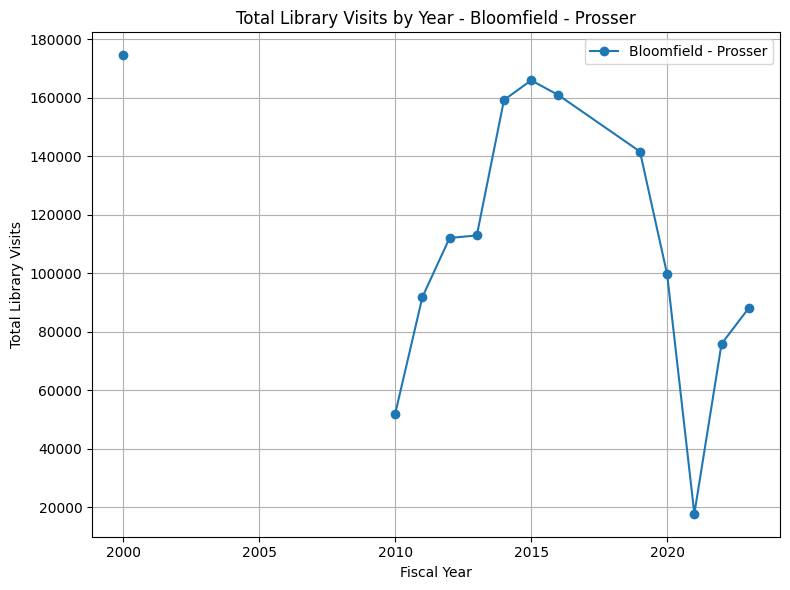

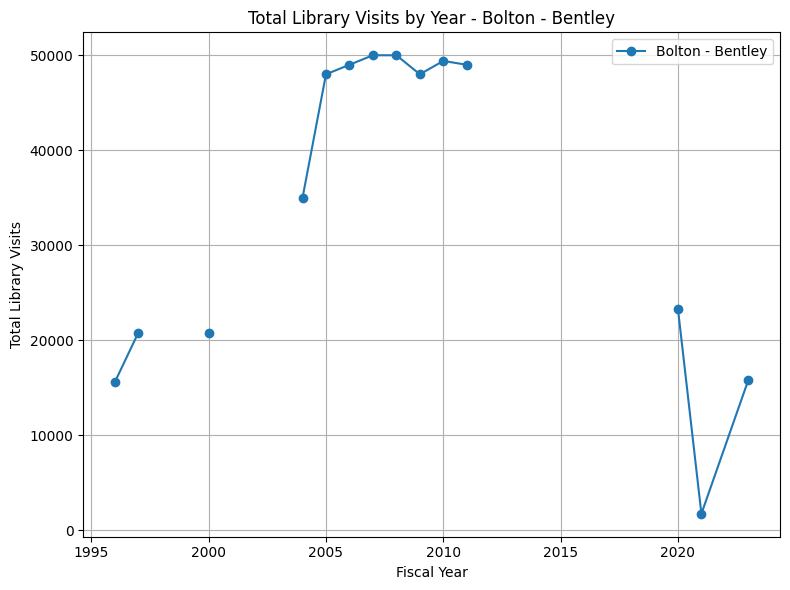

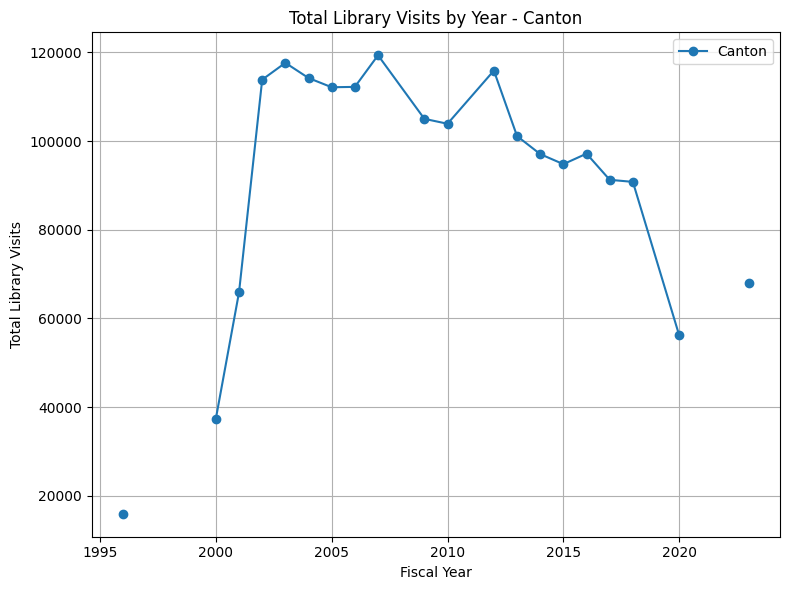

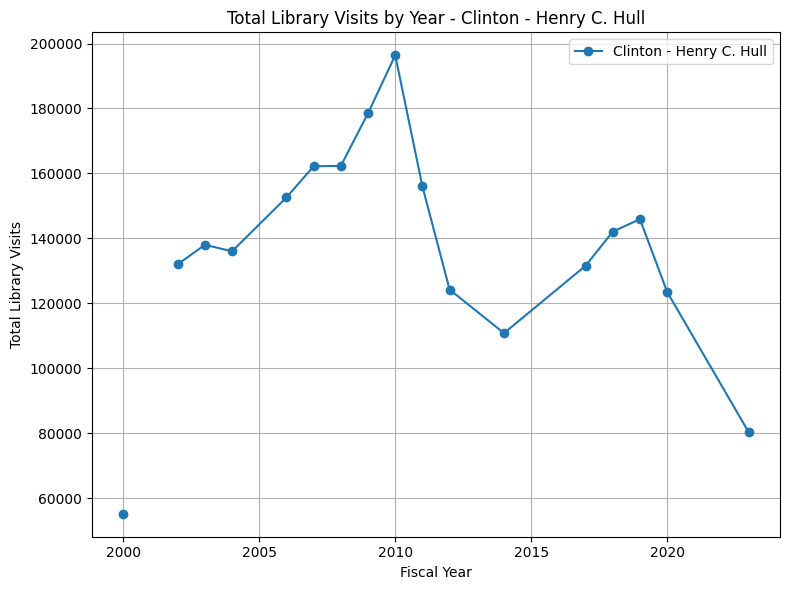

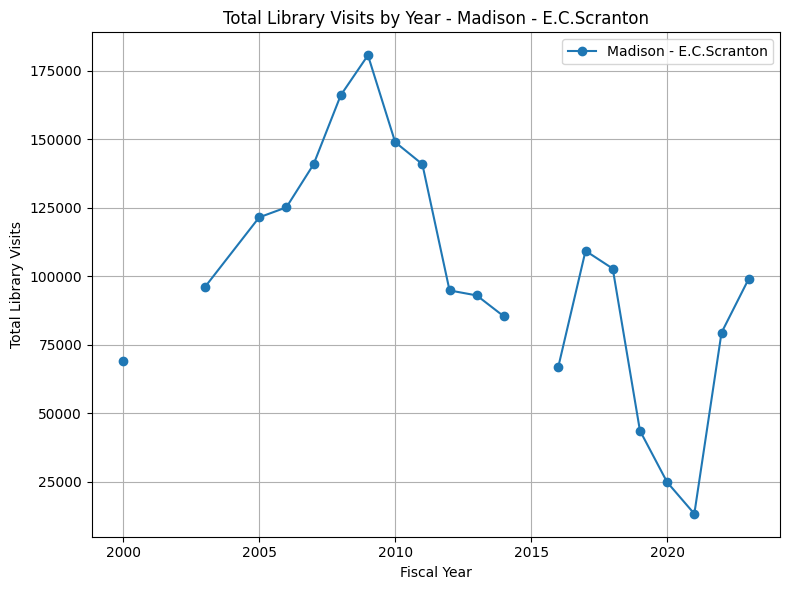

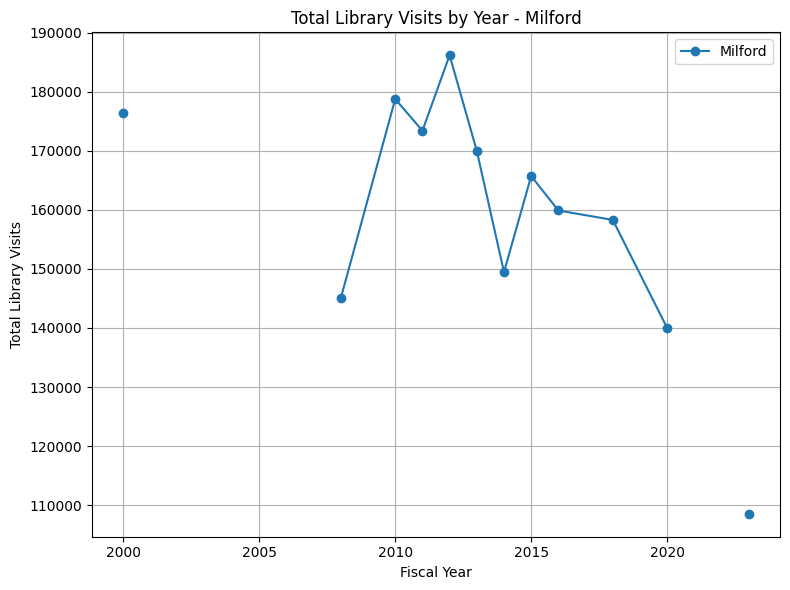

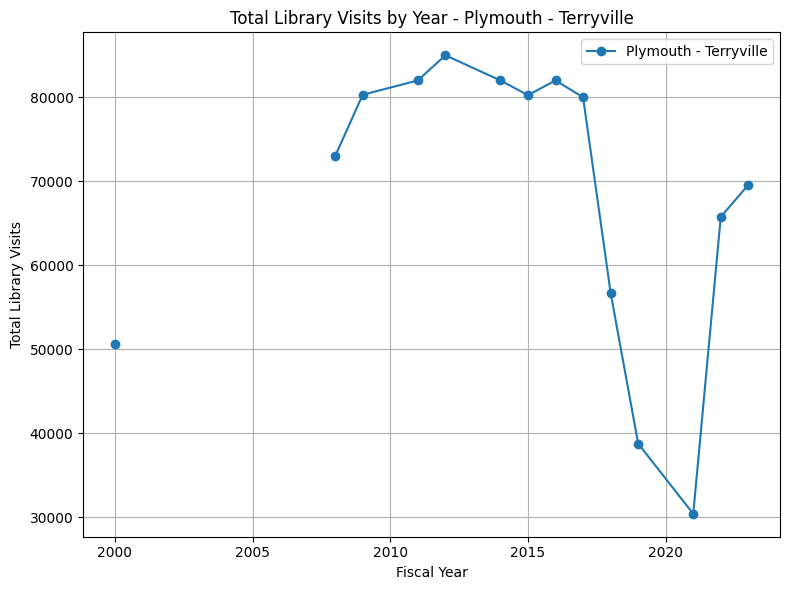

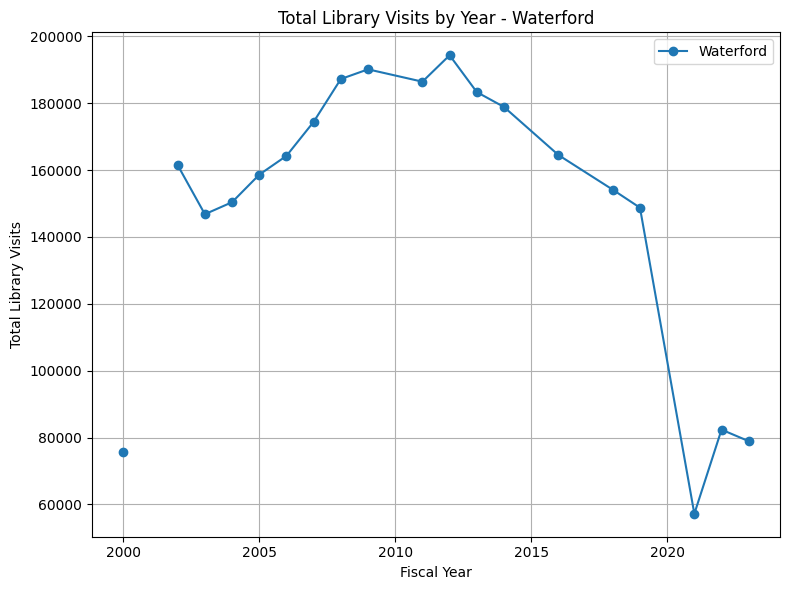

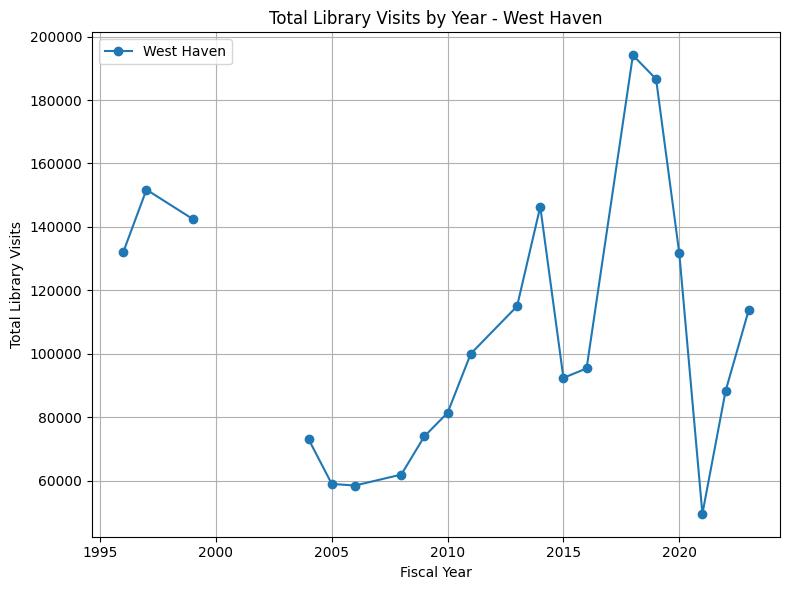

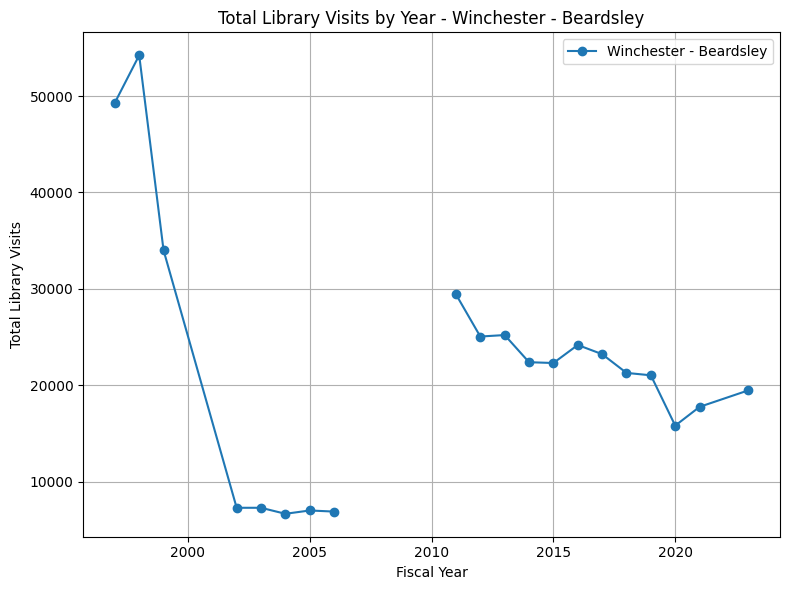

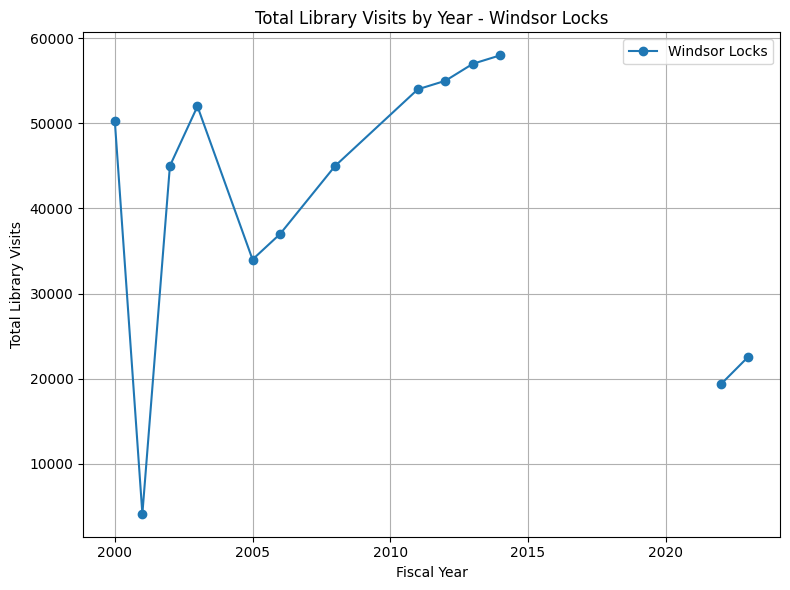

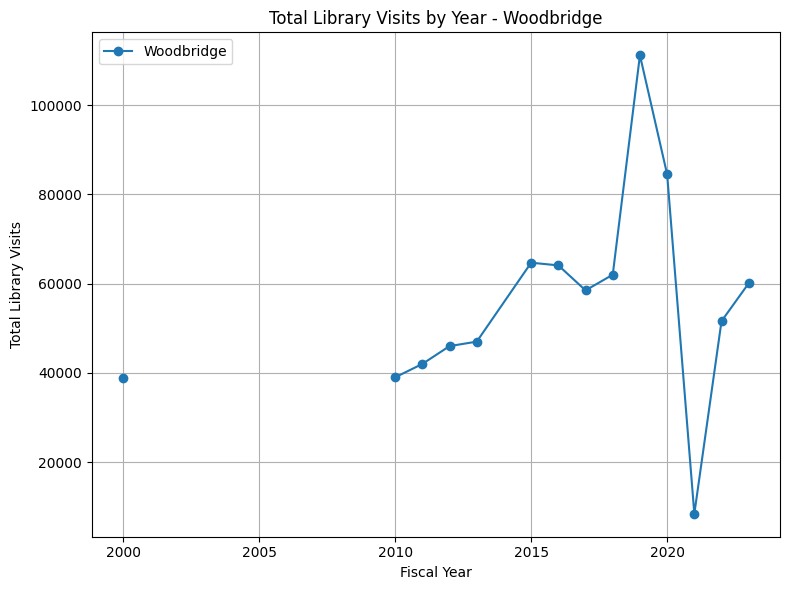

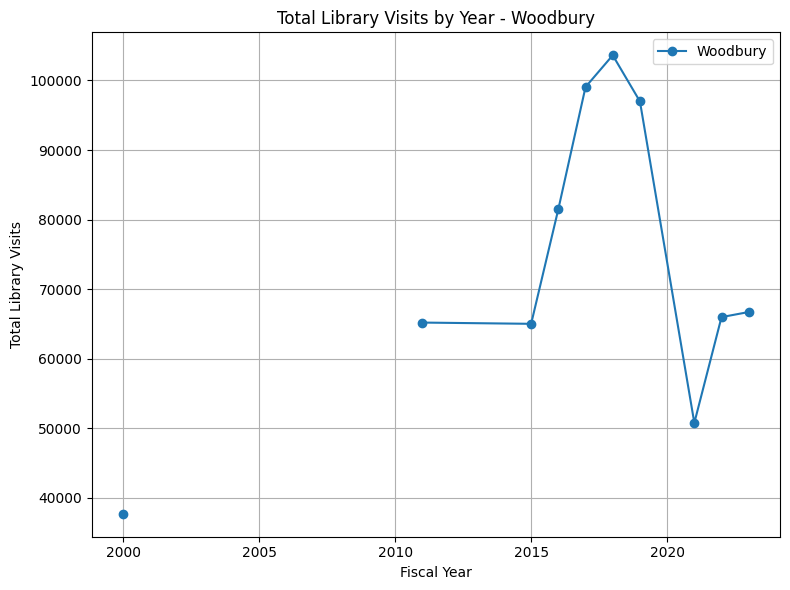

In [135]:
# 1. זהה ספריות עם לפחות 3 ערכים חסרים בעמודת 'Total Library Visits'
missing_counts = train_df[train_df['Total Library Visits'].isnull()].groupby('Library').size()
libraries_with_missing = missing_counts[missing_counts >= 3].index

# 2. סינון הנתונים לספריות עם לפחות 3 ערכים חסרים
filtered_data = train_df[train_df['Library'].isin(libraries_with_missing)]

# 3. ציור גרף נפרד לכל ספרייה
for library in libraries_with_missing:
    library_data = filtered_data[filtered_data['Library'] == library]
    plt.figure(figsize=(8, 6))
    plt.plot(
        library_data['Fiscal Year'],
        library_data['Total Library Visits'],
        marker='o',
        label=library
    )
    plt.title(f'Total Library Visits by Year - {library}')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Total Library Visits')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


את עמודת ביקורים נשלים לפי אינטרפולציה לינארית. ברוב הספריות לא תמיד יש קו מגמה ברור ולכן אינטרפולציה תוכל לפתור את הבעיה בצורה מספקת. במקרה והערך החסר הוא הראשון או האחרון נשתמש בערך הזמין לפניו מלפנים או מאחור

In [136]:
# פונקציה למילוי ערכים חסרים בעזרת אינטרפולציה ו-backfill
def fill_missing_values_with_interpolation_and_backfill(df, column_name):
    """
    פונקציה למילוי ערכים חסרים בעמודה ספציפית בעזרת אינטרפולציה,
    עם טיפול בערכים בתחילת הרשימה באמצעות backfill.
    """
    libraries_with_missing = df[df[column_name].isnull()]['Library'].unique()
    
    for library in libraries_with_missing:
        library_data = df[df['Library'] == library].copy()
        
        # אינטרפולציה למילוי ערכים באמצע
        library_data[column_name] = library_data[column_name].interpolate(method='linear')
        
        # שימוש ב-backfill לערכים חסרים בתחילת הרשימה
        library_data[column_name] = library_data[column_name].bfill()
        
        # מילוי הערך האחרון אם עדיין חסר
        if library_data[column_name].isnull().iloc[-1]:
            last_valid_value = library_data[column_name].ffill().iloc[-1]  # ערך קודם זמין
            library_data[column_name].iloc[-1] = last_valid_value
        
        # עדכון ה-DataFrame הראשי
        df.loc[library_data.index, column_name] = library_data[column_name]
    
    return df

# יישום הפונקציה על Train ו-Test
train_df = fill_missing_values_with_interpolation_and_backfill(train_df, 'Total Library Visits')
test_df = fill_missing_values_with_interpolation_and_backfill(test_df, 'Total Library Visits')


פונקציות ל-2 גרפים אשר יעזרו לנו לנסות לאבחן את התנהגות כל עמודה ואיך להשלים ערכים חסרים

In [137]:
def plot_general_trend(dataframe, column_name):
    
    trend = dataframe.groupby('Fiscal Year')[column_name].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(trend.index, trend.values, marker='o', linestyle='-', color='b')
    plt.title(f'Trend of {column_name} Over Years', fontsize=14)
    plt.xlabel('Fiscal Year', fontsize=12)
    plt.ylabel(f'Average {column_name}', fontsize=12)
    plt.grid(True)
    plt.show()
import random

def plot_random_library_trends(dataframe, column_name):

    random_libraries = random.sample(list(dataframe['Library'].unique()), 20)
    plt.figure(figsize=(12, 8))
    
    for library in random_libraries:
        library_data = dataframe[dataframe['Library'] == library].groupby('Fiscal Year')[column_name].mean()
        plt.plot(library_data.index, library_data.values, marker='o', label=library)
    
    plt.title(f'Trend of {column_name} for Random Libraries', fontsize=14)
    plt.xlabel('Fiscal Year', fontsize=12)
    plt.ylabel(f'Average {column_name}', fontsize=12)
    plt.legend(title='Library', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


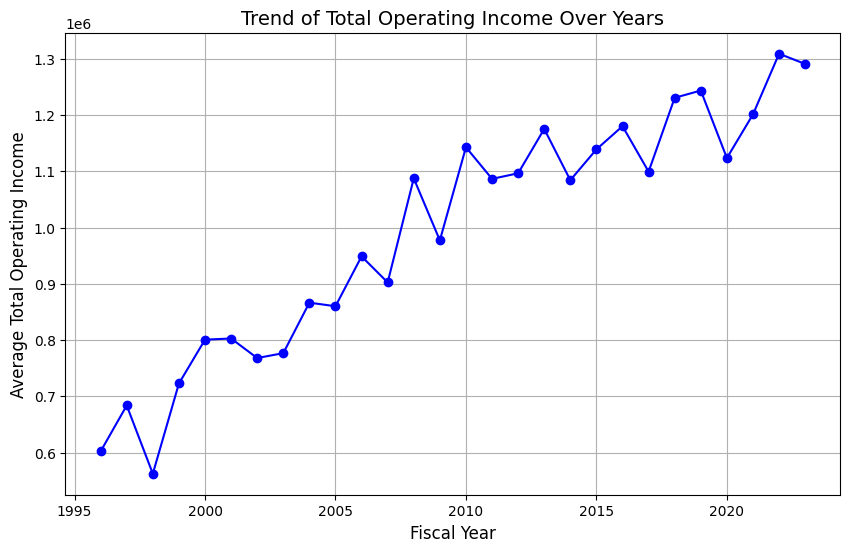

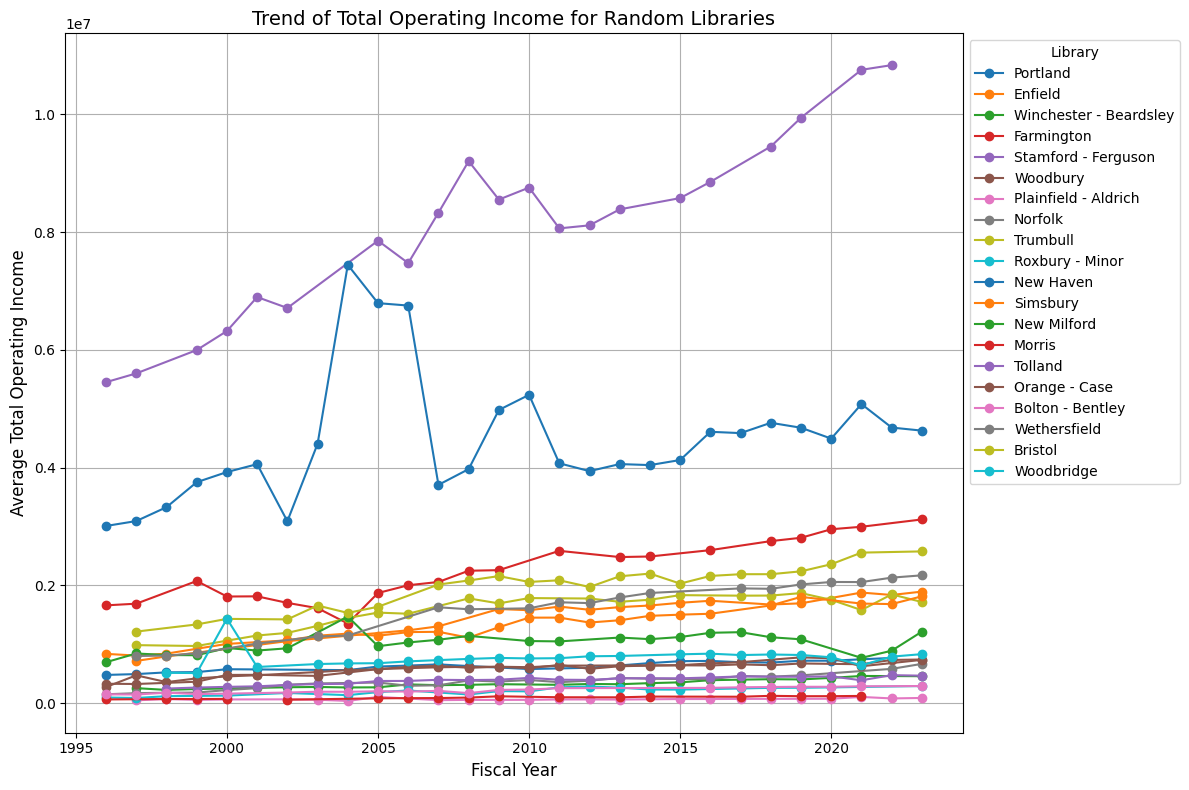

In [138]:
plot_general_trend(train_df, 'Total Operating Income')
plot_random_library_trends(train_df, 'Total Operating Income')

In [139]:
def fill_missing_and_zero_values(df, column_name):
    """
    פונקציה להשלמת ערכים חסרים ואפסים בעמודה מסוימת.
    """
    # החלפת ערכים של 0 ל-NaN
    df[column_name] = df[column_name].replace(0, pd.NA)
    
    # מיון הנתונים לפי Library ו-Fiscal Year
    df = df.sort_values(by=['Library', 'Fiscal Year']).reset_index(drop=True)
    
    # השלמת ערכים חסרים קדימה ואחורה
    df[column_name] = df.groupby('Library')[column_name].ffill()
    df[column_name] = df.groupby('Library')[column_name].bfill()
    
    return df

# יישום הפונקציה על Train ו-Test
train_df = fill_missing_and_zero_values(train_df, 'Total Collection')
test_df = fill_missing_and_zero_values(test_df, 'Total Collection')


In [140]:
def fill_missing_values_by_regression(df, column_to_fill, reference_column, group_by_column):
    """
    פונקציה למילוי ערכים חסרים בעזרת רגרסיה לפי קבוצה.
    
    פרמטרים:
    ----------
    df : DataFrame
        הנתונים לעיבוד.
    column_to_fill : str
        שם העמודה שבה נרצה להשלים ערכים חסרים.
    reference_column : str
        שם עמודת ההתייחסות (X לרגרסיה, למשל 'Fiscal Year').
    group_by_column : str
        שם העמודה לפי קבוצות (למשל 'Library').
        
    מחזיר:
    -------
    df : DataFrame
        הנתונים לאחר מילוי הערכים החסרים.
    """
    for group in df[group_by_column].unique():
        # סינון נתונים עבור הקבוצה הנוכחית
        group_data = df[df[group_by_column] == group]
        
        # הכנת הנתונים
        X = group_data[reference_column].values.reshape(-1, 1)
        y = group_data[column_to_fill].values
        
        # אימון מודל רגרסיה על ערכים קיימים בלבד
        valid_mask = ~np.isnan(y)
        if valid_mask.sum() > 0:  # אם יש ערכים קיימים לאימון
            model = LinearRegression()
            model.fit(X[valid_mask], y[valid_mask])
            
            # חיזוי ערכים חסרים בלבד
            missing_mask = np.isnan(y)
            if missing_mask.any():
                X_missing = X[missing_mask]
                predictions = model.predict(X_missing)
                
                # השלמת הערכים החסרים ב-DataFrame
                df.loc[group_data.index[missing_mask], column_to_fill] = predictions
                
    return df



In [141]:
# יישום הפונקציה על Train ו-Test
train_df = fill_missing_values_by_regression(train_df, 'Total Operating Income', 'Fiscal Year', 'Library')
test_df = fill_missing_values_by_regression(test_df, 'Total Operating Income', 'Fiscal Year', 'Library')


בחינת התנהגות עמודת מיסים

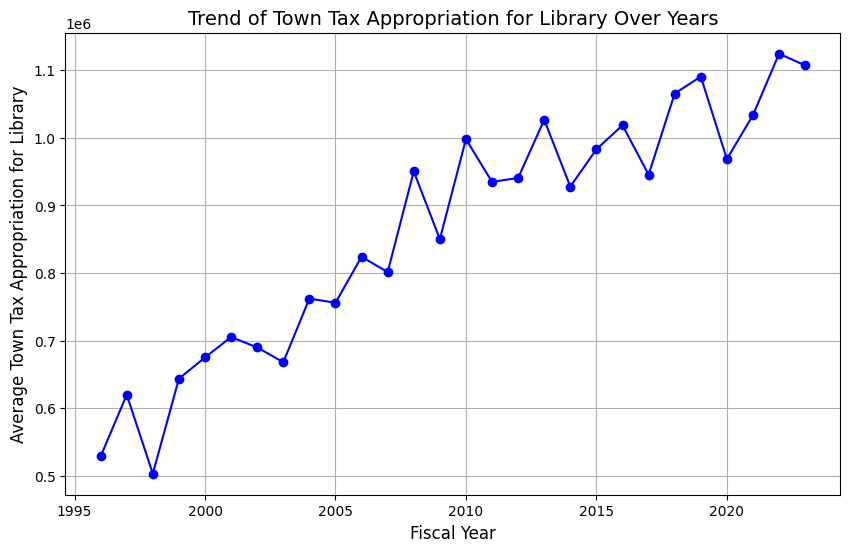

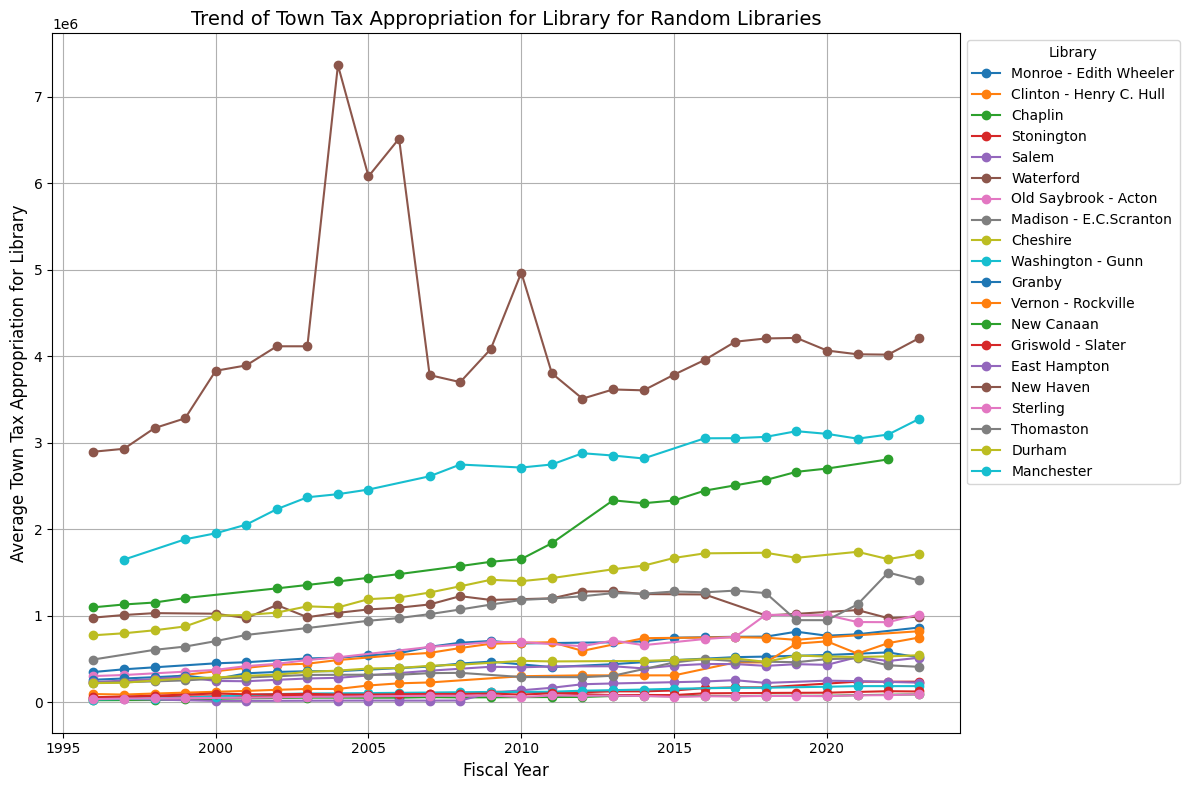

In [142]:
plot_general_trend(train_df, 'Town Tax Appropriation for Library')
plot_random_library_trends(train_df, 'Town Tax Appropriation for Library')

השלמה לפי רגרסיה

In [143]:
# החלפת אפסים ב-NaN
train_df['Town Tax Appropriation for Library'] = train_df['Town Tax Appropriation for Library'].replace(0, np.nan)
test_df['Town Tax Appropriation for Library'] = test_df['Town Tax Appropriation for Library'].replace(0, np.nan)

# יישום הפונקציה על Train ו-Test
train_df = fill_missing_values_by_regression(train_df, 'Town Tax Appropriation for Library', 'Fiscal Year', 'Library')
test_df = fill_missing_values_by_regression(test_df, 'Town Tax Appropriation for Library', 'Fiscal Year', 'Library')



בחינת עמודת הוצאות תפעול

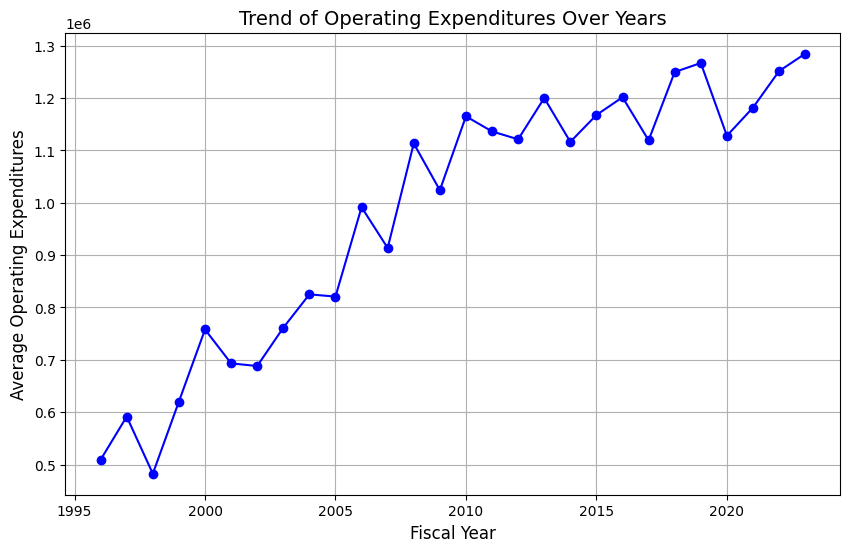

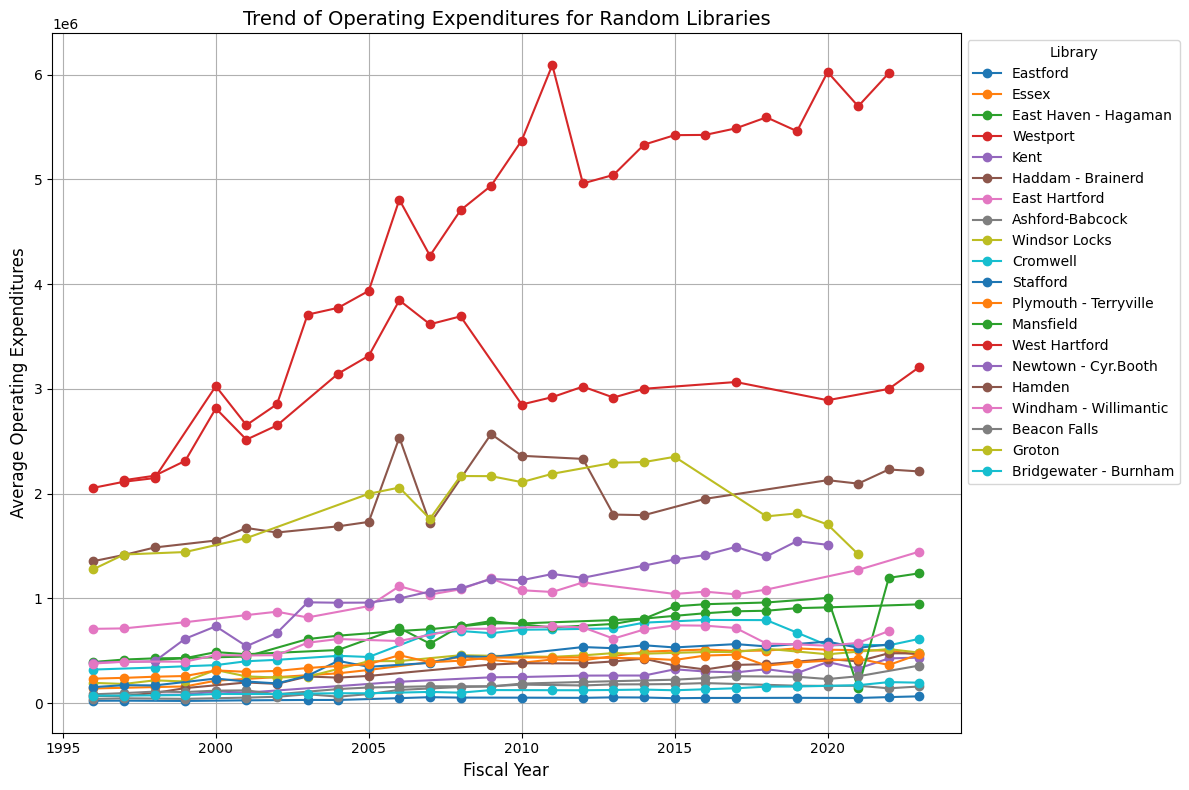

In [144]:
plot_general_trend(train_df, 'Operating Expenditures')
plot_random_library_trends(train_df,'Operating Expenditures')

השלמה לפי רגרסיה

In [145]:
# יישום הפונקציה על Train ו-Test
train_df = fill_missing_values_by_regression(train_df, 'Operating Expenditures', 'Fiscal Year', 'Library')
test_df = fill_missing_values_by_regression(test_df, 'Operating Expenditures', 'Fiscal Year', 'Library')

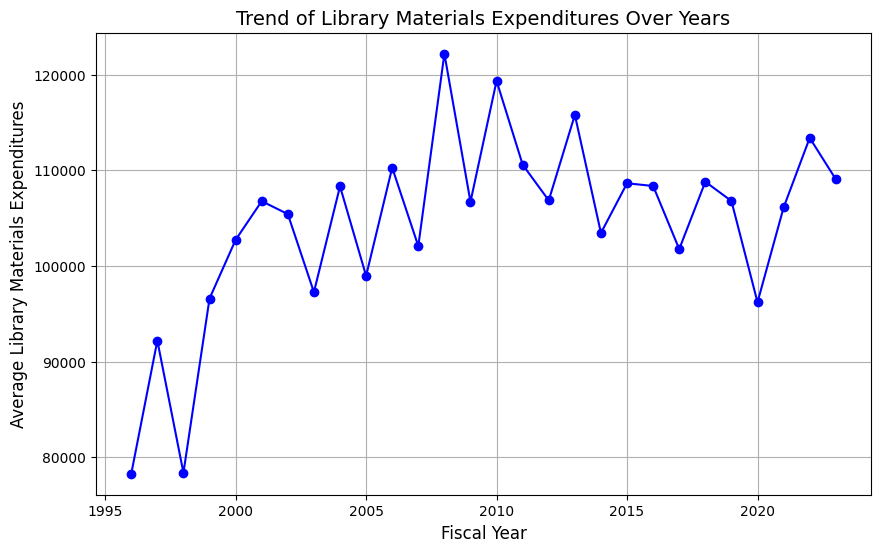

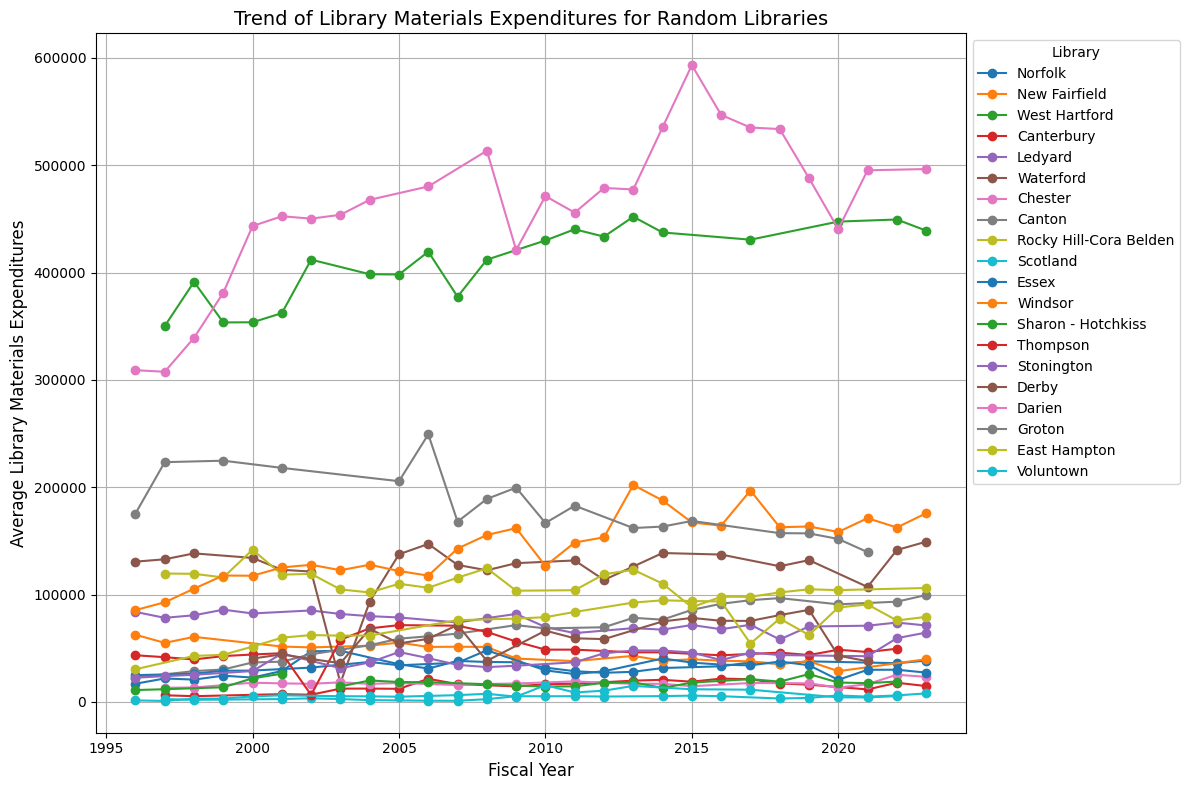

In [146]:
plot_general_trend(train_df, 'Library Materials Expenditures')
plot_random_library_trends(train_df,'Library Materials Expenditures')

נמלא ערכים חסרים לפי ממוצע של הספריה

In [147]:
def fill_missing_with_library_mean(dataframe, column_name):

    # השלמה לפי ממוצע פר ספריה
    dataframe[column_name] = dataframe.groupby('Library')[column_name].transform(
        lambda x: x.fillna(x.mean())
    )
    return dataframe




In [148]:
# עבור ה-Train
train_df = fill_missing_with_library_mean(train_df, 'Library Materials Expenditures')

# עבור ה-Test
test_df = fill_missing_with_library_mean(test_df, 'Library Materials Expenditures')

גם בדירוג החברתי נמלא לפי ממוצע הספריה

In [149]:
# מילוי ערכים חסרים בעמודת AENGLC Rank ב-Train
train_df = fill_missing_with_library_mean(train_df, 'AENGLC Rank')

# מילוי ערכים חסרים בעמודת AENGLC Rank ב-Test
test_df = fill_missing_with_library_mean(test_df, 'AENGLC Rank')


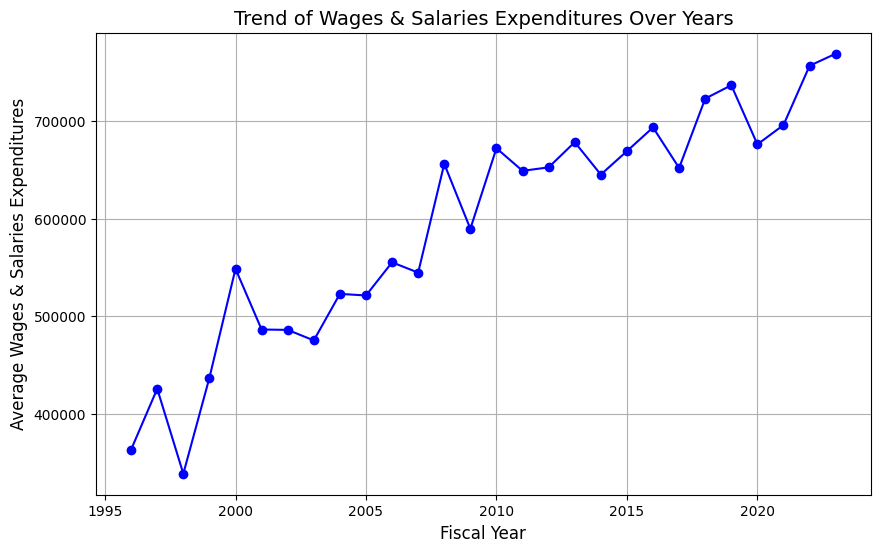

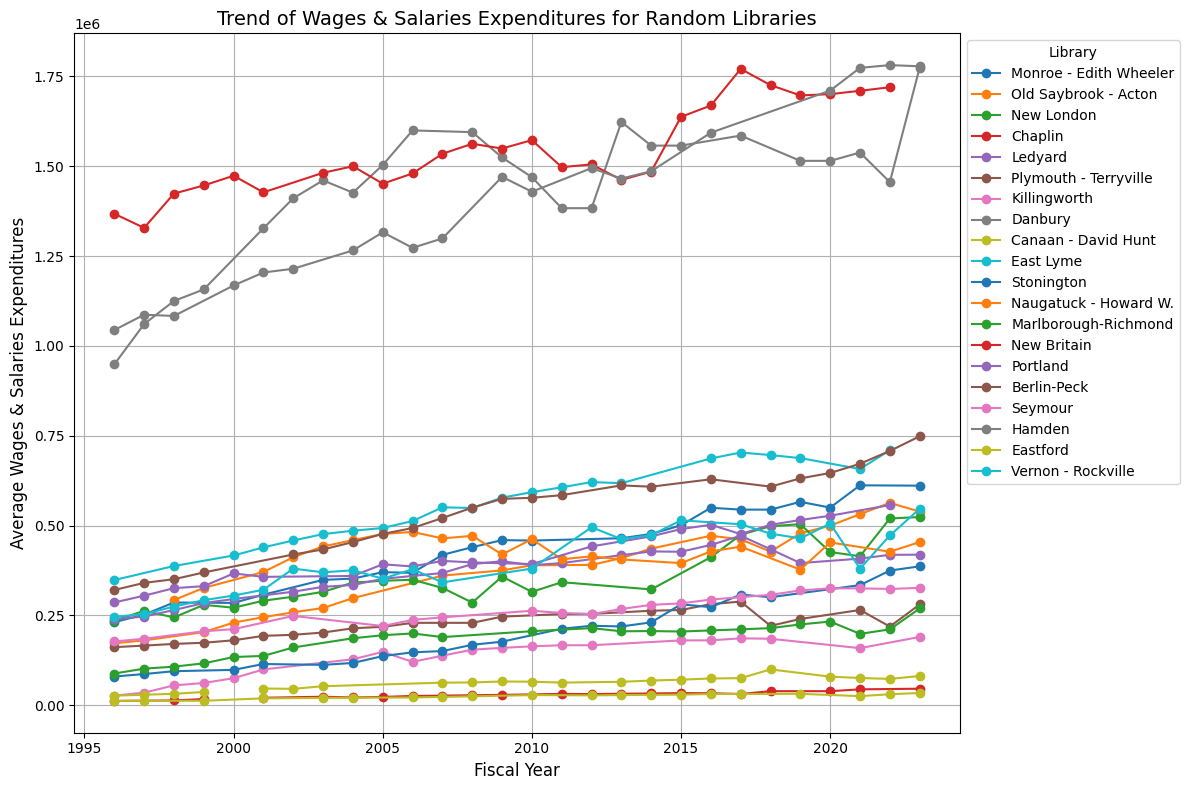

In [150]:
plot_general_trend(train_df, 'Wages & Salaries Expenditures')
plot_random_library_trends(train_df,'Wages & Salaries Expenditures')

In [151]:
# אינטרפולציה לינארית עבור Train
train_df['Wages & Salaries Expenditures'] = train_df['Wages & Salaries Expenditures'].interpolate(method='linear')

# אינטרפולציה לינארית עבור Test
test_df['Wages & Salaries Expenditures'] = test_df['Wages & Salaries Expenditures'].interpolate(method='linear')


In [152]:
# חישוב קורלציה בין העמודות
correlation = df[['Total Programs (Synchronous + Prerecorded)', 'Total Program Attendance & Views']].corr()
print(correlation)


                                            Total Programs (Synchronous + Prerecorded)  \
Total Programs (Synchronous + Prerecorded)                                    1.000000   
Total Program Attendance & Views                                              0.850898   

                                            Total Program Attendance & Views  
Total Programs (Synchronous + Prerecorded)                          0.850898  
Total Program Attendance & Views                                    1.000000  


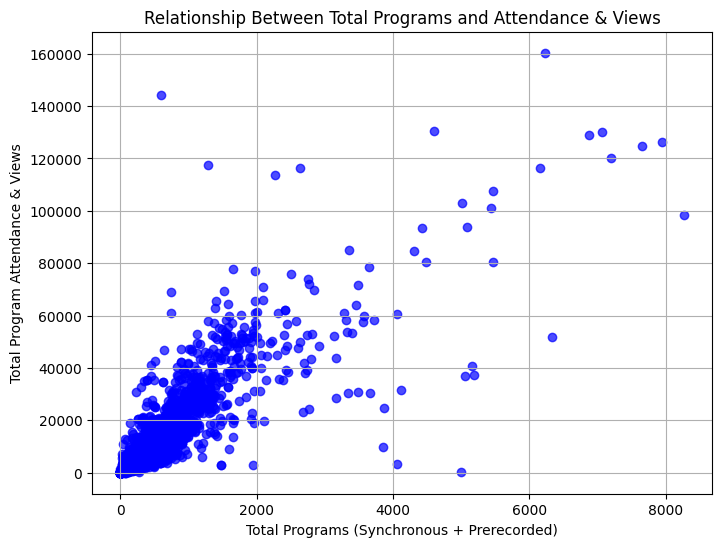

In [153]:
# סינון נתונים שבהם לשתי העמודות יש ערכים
valid_data = df[['Total Programs (Synchronous + Prerecorded)', 'Total Program Attendance & Views']].dropna()

# יצירת גרף פיזור
plt.figure(figsize=(8, 6))
plt.scatter(valid_data['Total Programs (Synchronous + Prerecorded)'], valid_data['Total Program Attendance & Views'], alpha=0.7, color='blue')
plt.title('Relationship Between Total Programs and Attendance & Views')
plt.xlabel('Total Programs (Synchronous + Prerecorded)')
plt.ylabel('Total Program Attendance & Views')
plt.grid(True)
plt.show()


In [154]:
def fill_missing_related_columns(df, col1, col2, group_col):
    # 1. מציאת יחס ממוצע
    ratios = {}
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group]
        valid_rows = group_data.dropna(subset=[col1, col2])
        if not valid_rows.empty:
            ratios[group] = (valid_rows[col2] / valid_rows[col1]).mean()
    
    # 2. השלמת ערכים חסרים
    for group, ratio in ratios.items():
        if not np.isnan(ratio):
            group_data = df[df[group_col] == group]
            
            # השלמת col2 לפי col1
            missing_col2 = group_data[group_data[col2].isnull() & group_data[col1].notnull()]
            df.loc[missing_col2.index, col2] = missing_col2[col1] * ratio
            
            # השלמת col1 לפי col2
            missing_col1 = group_data[group_data[col1].isnull() & group_data[col2].notnull()]
            df.loc[missing_col1.index, col1] = missing_col1[col2] / ratio

    # 3. אינטרפולציה ו-Backfill
    def safe_interpolate(group):
        if len(group.dropna()) >= 4:  # לפחות 4 נקודות לאינטרפולציה מסדר 3
            return group.interpolate(method='spline', order=3).bfill()
        else:
            return group.interpolate(method='linear').bfill()

    df[col1] = df.groupby(group_col)[col1].apply(safe_interpolate)
    df[col2] = df.groupby(group_col)[col2].apply(lambda x: x.bfill())
    
    return df

# יישום על Train ו-Test
train_df = fill_missing_related_columns(train_df, 'Total Programs (Synchronous + Prerecorded)', 
                                        'Total Program Attendance & Views', 'Library')
test_df = fill_missing_related_columns(test_df, 'Total Programs (Synchronous + Prerecorded)', 
                                       'Total Program Attendance & Views', 'Library')



The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.


In [155]:
def fill_registered_borrowers(df):
    """
    פונקציה למילוי ערכים חסרים בעמודת 'Total Registered Borrowers' עבור דאטה מסוים.
    """
    # זיהוי ספריות עם ערכים חסרים בעמודת 'Total Registered Borrowers'
    libraries_with_missing = df[df['Total Registered Borrowers'].isnull()]['Library'].unique()

    # מילוי הערכים עבור כל ספרייה
    for library in libraries_with_missing:
        # שליפת הנתונים של הספרייה
        library_data = df[df['Library'] == library].copy()

        # אינטרפולציה למילוי ערכים באמצע
        interpolated_values = library_data['Total Registered Borrowers'].interpolate(method='linear')

        # בדיקה אם נשארו ערכים חסרים לאחר אינטרפולציה
        if interpolated_values.isnull().any():
            for idx in library_data.index:
                if pd.isnull(interpolated_values[idx]):
                    # חישוב ממוצע הערכים בספרייה
                    library_mean = library_data['Total Registered Borrowers'].mean()

                    # מילוי לפי ממוצע הספרייה בלבד
                    if not pd.isnull(library_mean):
                        interpolated_values[idx] = library_mean

        # עדכון ה-DataFrame הראשי
        df.loc[library_data.index, 'Total Registered Borrowers'] = interpolated_values

    return df

# יישום הפונקציה על Train ו-Test
train_df = fill_registered_borrowers(train_df)
test_df = fill_registered_borrowers(test_df)


עמודות עם מעט מאוד ערכים חסרים נשתמש פשוט במילוי לאחור

In [156]:
def backfill_column(df, column_name):
    """
    פונקציה למילוי ערכים חסרים בעזרת backfill עבור עמודה מסוימת.
    """
    df[column_name] = df[column_name].fillna(method='backfill')
    return df

# יישום הפונקציה על עמודת 'Total Circulation' ב-Train ו-Test
train_df = backfill_column(train_df, 'Total Circulation')
test_df = backfill_column(test_df, 'Total Circulation')

In [157]:
#השלמת ערך חריג יחיד בעמודת אוכלוסיה
train_df = backfill_column(train_df, 'Population of Service Area')
test_df = backfill_column(test_df, 'Population of Service Area')

הדאטה הגיעה עם עמודת פר תושב אבל לאחר כל מיני עיבודים ושינויים שעשינו נרצה לחשב את העמודות מחדש וכך גם להשלים בהן את הערכים החסרים

In [158]:
def fill_per_capita_columns(df, per_capita_columns, total_columns, population_column):
    """
    פונקציה למילוי ערכים חסרים בעמודות 'פר נפש' על ידי חלוקת עמודת האב בעמודת האוכלוסייה.

    Parameters:
        df (DataFrame): הדאטה שבו נרצה להשלים ערכים.
        per_capita_columns (list): רשימת עמודות 'פר נפש' שבהן יש ערכים חסרים.
        total_columns (list): רשימת עמודות האב המתאימות.
        population_column (str): שם עמודת האוכלוסייה.

    Returns:
        DataFrame: הדאטה עם ערכים חסרים מושלמים.
    """
    for per_capita_col, total_col in zip(per_capita_columns, total_columns):
        missing_mask = df[per_capita_col].isnull() & df[total_col].notnull() & df[population_column].notnull()
        df.loc[missing_mask, per_capita_col] = df.loc[missing_mask, total_col] / df.loc[missing_mask, population_column]
    return df


# רשימת כל עמודות ה-per capita ועמודות האב שלהן
per_capita_columns = [
    'Library Visits Per Capita Served', 
    'Percent of Residents with Library Cards',
    'Circulation Per Capita Served',
    'Total Program Attendance & Views Per Capita Served',
    'Collection Per Capita Served',
    'Operating Income Per Capita',
    'Tax Appropriation Per Capita Served',
    'Operating Expenditures Per Capita'
]
total_columns = [
    'Total Library Visits',
    'Total Registered Borrowers',
    'Total Circulation',
    'Total Program Attendance & Views',
    'Total Collection',
    'Total Operating Income',
    'Town Tax Appropriation for Library',
    'Operating Expenditures'
]
population_column = 'Population of Service Area'

# יישום על Train
train_df = fill_per_capita_columns(train_df, per_capita_columns, total_columns, population_column)

# יישום על Test
test_df = fill_per_capita_columns(test_df, per_capita_columns, total_columns, population_column)


# זיהוי ערכים חריגים וניקוי רעשים

 הנחה שישנם עמודות עם הרבה יותר ערכים חריגים אחרי 2020 בגלל הקורונה והשפעתה לכן ננרמל את הערכים לפי כל ספריה ונמצא עבור כל עמודה את הערכים החריגים לפי 3 סטיות תקן

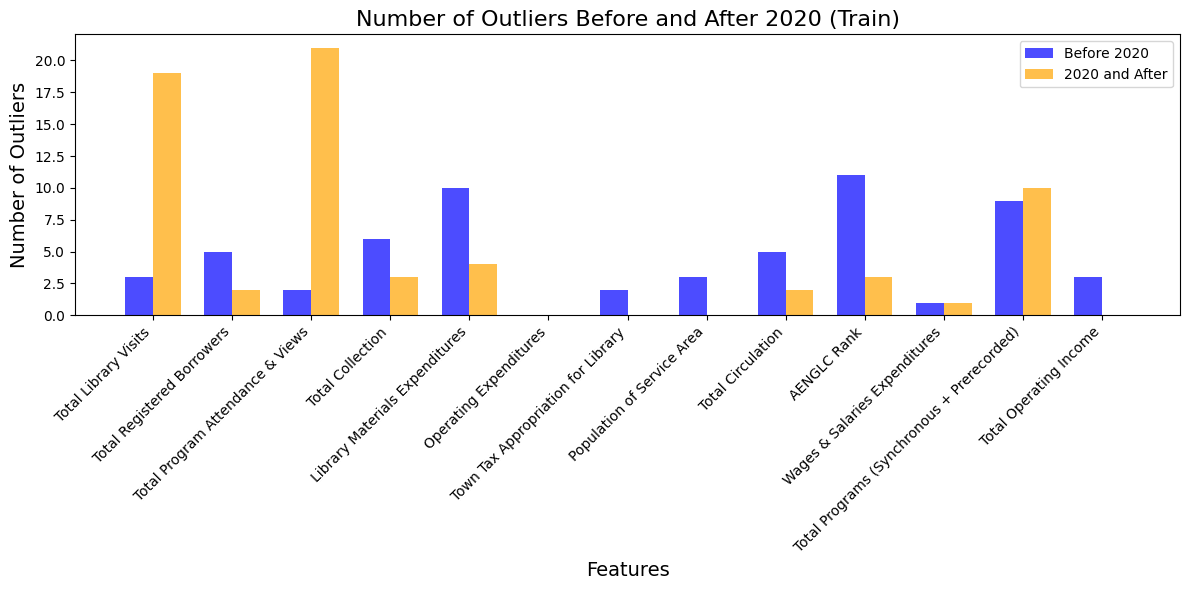


Number of outliers before 2020 (Train):
Total Library Visits: 3
Total Registered Borrowers: 5
Total Program Attendance & Views: 2
Total Collection: 6
Library Materials Expenditures: 10
Operating Expenditures: 0
Town Tax Appropriation for Library: 2
Population of Service Area: 3
Total Circulation: 5
AENGLC Rank: 11
Wages & Salaries Expenditures: 1
Total Programs (Synchronous + Prerecorded): 9
Total Operating Income: 3

Number of outliers from 2020 onwards (Train):
Total Library Visits: 19
Total Registered Borrowers: 2
Total Program Attendance & Views: 21
Total Collection: 3
Library Materials Expenditures: 4
Operating Expenditures: 0
Town Tax Appropriation for Library: 0
Population of Service Area: 0
Total Circulation: 2
AENGLC Rank: 3
Wages & Salaries Expenditures: 1
Total Programs (Synchronous + Prerecorded): 10
Total Operating Income: 0


In [159]:
# פונקציה לנרמול וזיהוי ערכים חריגים
def normalize_and_detect_outliers(df, columns):
    normalized_df = df.copy()
    
    # נרמול לפי ספריה (Z-Score)
    for col in columns:
        normalized_df[col + '_Normalized'] = normalized_df.groupby('Library')[col].transform(
            lambda x: (x - x.mean()) / x.std()
        )
        # זיהוי ערכים חריגים (Z-Score > 3)
        normalized_df[col + '_Normalized_Outlier'] = normalized_df[col + '_Normalized'].abs() > 3
    
    return normalized_df

# עמודות לנרמול
columns_to_normalize = [
    'Total Library Visits', 
    'Total Registered Borrowers',
    'Total Program Attendance & Views', 
    'Total Collection', 
    'Library Materials Expenditures', 
    'Operating Expenditures', 
    'Town Tax Appropriation for Library',
    'Population of Service Area',
    'Total Circulation',
    'AENGLC Rank',
    'Wages & Salaries Expenditures',
    'Total Programs (Synchronous + Prerecorded)',
    'Total Operating Income'
]

# הפעלת פונקציית הנרמול על ה-Train בלבד
normalized_train_df = normalize_and_detect_outliers(train_df, columns_to_normalize)

# חלוקה בין השנים לפני 2020 ואחרי (כולל) על ה-Train בלבד
before_2020 = normalized_train_df[normalized_train_df['Fiscal Year'] < 2020]
after_2020 = normalized_train_df[normalized_train_df['Fiscal Year'] >= 2020]

# חישוב מספר הערכים החריגים בכל עמודה
features = [col + '_Normalized_Outlier' for col in columns_to_normalize]

outliers_before = [before_2020[feature].sum() for feature in features]
outliers_after = [after_2020[feature].sum() for feature in features]
feature_names = [feature.replace('_Normalized_Outlier', '') for feature in features]

# גרף להשוואת מספר הערכים החריגים לפי שנים
x = np.arange(len(features))  # מיקום לעמודות

plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(x - bar_width/2, outliers_before, bar_width, label='Before 2020', color='blue', alpha=0.7)
plt.bar(x + bar_width/2, outliers_after, bar_width, label='2020 and After', color='orange', alpha=0.7)

# פרטים לגרף
plt.xlabel('Features', fontsize=14)
plt.ylabel('Number of Outliers', fontsize=14)
plt.title('Number of Outliers Before and After 2020 (Train)', fontsize=16)
plt.xticks(x, feature_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# הצגת נתונים חריגים לדוגמה
print("\nNumber of outliers before 2020 (Train):")
for feature, count in zip(feature_names, outliers_before):
    print(f"{feature}: {count}")

print("\nNumber of outliers from 2020 onwards (Train):")
for feature, count in zip(feature_names, outliers_after):
    print(f"{feature}: {count}")


טיפול בעמודת אוספים. יכולה להיות בעלת סטיות גבוהות משום שברכישה או בניקוי מדפים יכולה להיות קפיצה פתאומית לכן ננקה רק חריגים קיצוניים

In [160]:
# חישוב Z-Score עבור Total Collection לפי ספרייה
train_df['Total Collection Z-Score'] = train_df.groupby('Library')['Total Collection'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# סינון הערכים החריגים
outliers = train_df[train_df['Total Collection Z-Score'].abs() > 3.5]

# הצגת טבלה עם הערכים החריגים
print("Outliers in Total Collection (Z-Score > 3.5):")
display(outliers[['Library', 'Fiscal Year', 'Total Collection', 'Total Collection Z-Score']])


Outliers in Total Collection (Z-Score > 3.5):


,Library,Fiscal Year,Total Collection,Total Collection Z-Score
2090,North Stonington-Wheeler,2005,197396.0,3.915568
3562,Woodstock - Bracken,2004,61910.0,4.437765


In [161]:
def handle_outliers(df, column, group_col, z_threshold=3.5):
    """
    טיפול בערכים חריגים בעמודה ספציפית לפי Z-Score והחלפתם בערך מהשנה העוקבת.

    Args:
        df (pd.DataFrame): מסגרת הנתונים
        column (str): שם העמודה לטיפול בערכים חריגים
        group_col (str): שם העמודה לפי קבוצות (למשל, ספרייה)
        z_threshold (float): סף זיהוי ערכים חריגים לפי Z-Score

    Returns:
        pd.DataFrame: מסגרת הנתונים לאחר הטיפול בערכים החריגים
    """
    df = df.sort_values([group_col, 'Fiscal Year']).copy()  # מיון לפי קבוצות ושנה

    # חישוב Z-Score עבור העמודה הנתונה
    z_score_col = f"{column}_Z-Score"
    df[z_score_col] = df.groupby(group_col)[column].transform(
        lambda x: (x - x.mean()) / x.std()
    )

    # זיהוי ערכים חריגים עם Z-Score מעל הסף
    outlier_col = f"{column}_Outlier"
    df[outlier_col] = df[z_score_col].abs() > z_threshold

    # יצירת עמודת עזר עם הערך מהשנה העוקבת
    next_year_col = f"{column}_Next_Year"
    df[next_year_col] = df.groupby(group_col)[column].shift(-1)

    # החלפת הערכים החריגים בערך מהשנה העוקבת
    df.loc[df[outlier_col], column] = df.loc[df[outlier_col], next_year_col]

    # הסרת עמודות עזר
    df.drop(columns=[z_score_col, outlier_col, next_year_col], inplace=True)

    return df

# דוגמה לשימוש בפונקציה עבור Train ו-Test
train_df = handle_outliers(train_df, column='Total Collection', group_col='Library')
test_df = handle_outliers(test_df, column='Total Collection', group_col='Library')



In [162]:
train_df = handle_outliers(train_df, column='Wages & Salaries Expenditures', group_col='Library')
test_df = handle_outliers(test_df, column='Wages & Salaries Expenditures', group_col='Library')


In [163]:
print(train_df.shape)
test_df.shape

(3581, 26)


(896, 25)

טיפול בעמודת סך ביקורים. לא נטפל בחריגים לאחר 2020 כי זה השפעות הקורונה. נטפל רק בחריגים מלפני

In [164]:
# חישוב Z-Score עבור Total Library Visits לפי ספרייה
train_df['Total Library Visits Z-Score'] = train_df.groupby('Library')['Total Library Visits'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# סינון הערכים החריגים לפני 2020
outliers_visits_before_2020 = train_df[(train_df['Fiscal Year'] < 2020) & (train_df['Total Library Visits Z-Score'].abs() > 3)]

# הצגת הטבלה עם הערכים החריגים
print("Outliers in Total Library Visits Before 2020 (Z-Score > 3):")
display(outliers_visits_before_2020[['Library', 'Fiscal Year', 'Total Library Visits', 'Total Library Visits Z-Score']])


Outliers in Total Library Visits Before 2020 (Z-Score > 3):


,Library,Fiscal Year,Total Library Visits,Total Library Visits Z-Score
245,Branford - Blackstone,1996,650000.0,3.766642
3446,Windsor,2004,627866.0,3.894099
3529,Woodbridge,2019,111211.0,3.178180


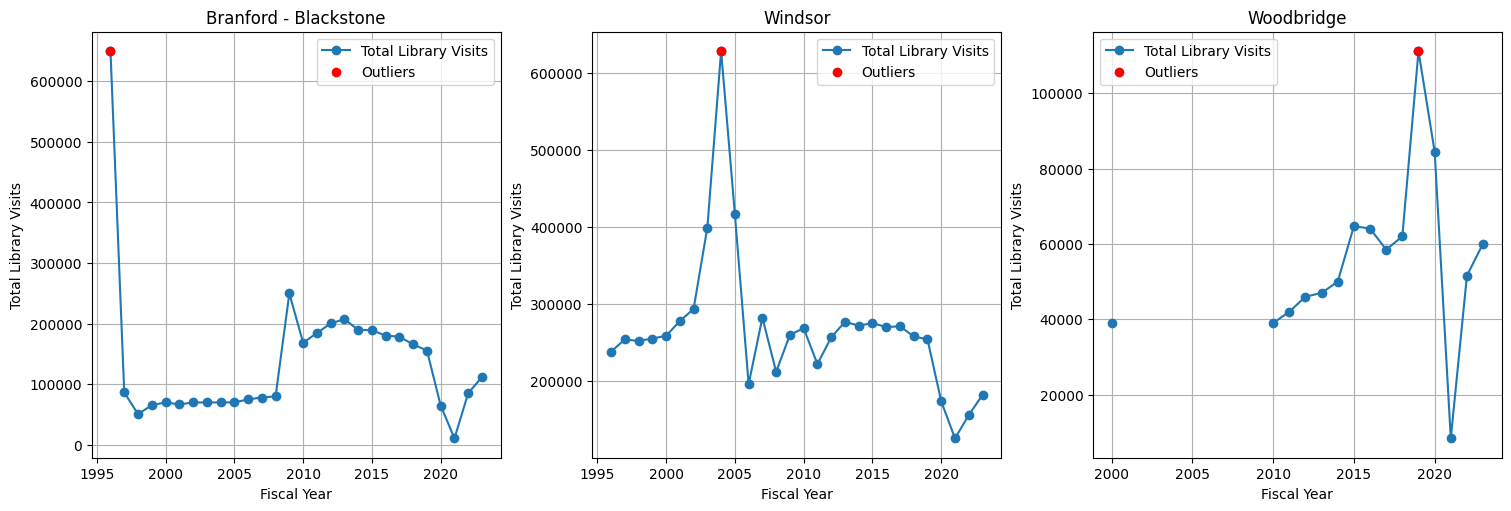

In [165]:
# רשימת הספריות החריגות
outlier_libraries = outliers_visits_before_2020['Library'].unique()

# מספר הספריות
num_libraries = len(outlier_libraries)

# הגדרת גודל הגריד (מספר שורות ועמודות)
cols = 3  # מספר הגרפים בכל שורה
rows = math.ceil(num_libraries / cols)  # מספר השורות הנדרש

# יצירת הגרפים
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)
axes = axes.flatten()  # הפיכת המערך של הצירים לחד-ממדי

for i, library in enumerate(outlier_libraries):
    # סינון הנתונים עבור הספרייה
    library_data = df[df['Library'] == library]
    outliers_for_library = outliers_visits_before_2020[outliers_visits_before_2020['Library'] == library]
    
    # גרף עבור הספרייה
    axes[i].plot(library_data['Fiscal Year'], library_data['Total Library Visits'], marker='o', label='Total Library Visits')
    axes[i].scatter(outliers_for_library['Fiscal Year'], outliers_for_library['Total Library Visits'], color='red', label='Outliers', zorder=5)
    
    # פרטים לגרף
    axes[i].set_title(f"{library}", fontsize=12)
    axes[i].set_xlabel('Fiscal Year')
    axes[i].set_ylabel('Total Library Visits')
    axes[i].legend()
    axes[i].grid(True)

# מחיקת גרפים ריקים (אם יש יותר תאים מאשר ספריות)
for j in range(len(outlier_libraries), len(axes)):
    fig.delaxes(axes[j])

# הצגת הגרפים
plt.show()


זהיתי שלוש ספריות שבוודאות מדובר ברעש ושלוש ספריות שהערך החריג הוא אולי כחלק ממגמה נקודתית לכן נחליף את הערך בספריות הרועשות בערך של השנה העוקבת

In [166]:
def forward_fill_outliers(df, outliers_df, column_name, zscore_column, threshold=3):
    """
    מבצע Forward Fill לערכים חריגים (Z-Score > threshold) בעמודה מסוימת לפי ספרייה.
    
    Parameters:
        df (DataFrame): הדאטה המלא שבו נרצה לעדכן את הערכים.
        outliers_df (DataFrame): הדאטה שבו זוהו הערכים החריגים.
        column_name (str): שם העמודה שבה מבצעים את המילוי.
        zscore_column (str): שם עמודת ה-Z-Score.
        threshold (float): סף הזיהוי לערכים חריגים.
    
    Returns:
        DataFrame: הדאטה המעודכן לאחר מילוי הערכים החריגים.
    """
    for library in outliers_df['Library'].unique():
        # עדכון הערכים בעזרת forward fill
        df.loc[df['Library'] == library, column_name] = df.loc[
            df['Library'] == library, column_name
        ].where(
            df.loc[df['Library'] == library, zscore_column].abs() <= threshold
        ).fillna(method='ffill')
    return df
# חישוב Z-Score ב-Train
train_df['Total Library Visits Z-Score'] = train_df.groupby('Library')['Total Library Visits'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# זיהוי ערכים חריגים ב-Train
outliers_visits_before_2020_train = train_df[
    (train_df['Fiscal Year'] < 2020) & (train_df['Total Library Visits Z-Score'].abs() > 3)
]

# הפעלת הפונקציה על ה-Train
train_df = forward_fill_outliers(
    df=train_df,
    outliers_df=outliers_visits_before_2020_train,
    column_name='Total Library Visits',
    zscore_column='Total Library Visits Z-Score',
    threshold=3
)

# בדיקה סופית ל-Train
remaining_outliers_train = train_df[
    (train_df['Fiscal Year'] < 2020) & (train_df['Total Library Visits Z-Score'].abs() > 3)
]

# חישוב Z-Score ב-Test
test_df['Total Library Visits Z-Score'] = test_df.groupby('Library')['Total Library Visits'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# זיהוי ערכים חריגים ב-Test
outliers_visits_before_2020_test = test_df[
    (test_df['Fiscal Year'] < 2020) & (test_df['Total Library Visits Z-Score'].abs() > 3)
]

# הפעלת הפונקציה על ה-Test
test_df = forward_fill_outliers(
    df=test_df,
    outliers_df=outliers_visits_before_2020_test,
    column_name='Total Library Visits',
    zscore_column='Total Library Visits Z-Score',
    threshold=3
)

# בדיקה סופית ל-Test
remaining_outliers_test = test_df[
    (test_df['Fiscal Year'] < 2020) & (test_df['Total Library Visits Z-Score'].abs() > 3)
]


# יצירת עמודות חדשות ועמודת מטרה

In [167]:
# חישוב עמודות per capita
columns_to_transform = [
    'Wages & Salaries Expenditures',
    'Library Materials Expenditures'
]
for column in columns_to_transform:
    train_df[f'{column} Per Capita'] = train_df[column] / train_df['Population of Service Area']
    test_df[f'{column} Per Capita'] = test_df[column] / test_df['Population of Service Area']
train_df.drop(columns=columns_to_transform, inplace=True)
test_df.drop(columns=columns_to_transform, inplace=True)

In [168]:
train_df['Total Registered Borrowers per Capita']=train_df['Total Registered Borrowers']/train_df['Population of Service Area']
test_df['Total Registered Borrowers per Capita']=test_df['Total Registered Borrowers']/test_df['Population of Service Area']

In [169]:
# חישוב עמודת Performance_Score
train_df['Performance_Score'] = (
    train_df['Library Visits Per Capita Served'] * 0.7 +
    train_df['Total Registered Borrowers per Capita'] * 0.3
)
test_df['Performance_Score'] = (
    test_df['Library Visits Per Capita Served'] * 0.7 +
    test_df['Total Registered Borrowers per Capita'] * 0.3
)

# הצגת סטטיסטיקות עבור Performance_Score
print("\nPerformance_Score Statistics:")
print(train_df['Performance_Score'].describe(percentiles=[0.25, 0.50, 0.75, 0.9]))



Performance_Score Statistics:
count    3581.000000
mean        4.190322
std         2.702202
min         0.096080
25%         2.315332
50%         3.635880
75%         5.416210
90%         7.616313
max        18.232688
Name: Performance_Score, dtype: float64


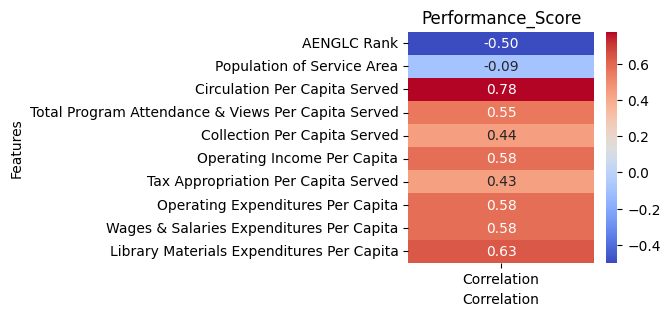

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# חישוב הקורלציות של כל עמודה מול 'Performance_Score'
correlation_with_target = data_subset.corr()['Performance_Score'].drop('Performance_Score')

# יצירת DataFrame לצורך Heatmap
correlation_df = correlation_with_target.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# יצירת Heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(correlation_df[['Correlation']], annot=True, cmap="coolwarm", fmt=".2f", cbar=True, 
            yticklabels=correlation_df['Feature'], xticklabels=['Correlation'])
plt.title("Performance_Score")
plt.ylabel("Features")
plt.xlabel("Correlation")
plt.show()


In [182]:
# קטגוריזציה לעמודת המטרה
def categorize_performance(score):
    if score > 7.7:
        return 'Excellent'
    elif score > 3.7:
        return 'Good'
    elif score > 2.4:
        return 'Average'
    else:
        return 'Failing'

train_df['Library_Performance'] = train_df['Performance_Score'].apply(categorize_performance)
test_df['Library_Performance'] = test_df['Performance_Score'].apply(categorize_performance)

# הצגת קטגוריות
print("\nTrain Performance Categories:")
print(train_df['Library_Performance'].value_counts())
print("\nTest Performance Categories:")
print(test_df['Library_Performance'].value_counts())



Train Performance Categories:
Good         1406
Failing       944
Average       881
Excellent     350
Name: Library_Performance, dtype: int64

Test Performance Categories:
Good         361
Failing      264
Average      191
Excellent     80
Name: Library_Performance, dtype: int64


# סיווג בעזרת מודלים

In [180]:
# **2. הגדרת פיצ'רים ועמודת המטרה**
features = [
    'AENGLC Rank',
    'Population of Service Area',
    'Circulation Per Capita Served',
    'Total Program Attendance & Views Per Capita Served',
    'Collection Per Capita Served',
    'Operating Income Per Capita',
    'Tax Appropriation Per Capita Served',
    'Operating Expenditures Per Capita',
    'Wages & Salaries Expenditures Per Capita',
    'Library Materials Expenditures Per Capita'
]
target = 'Library_Performance'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# המרת עמודת היעד למספרים
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# **3. הגדרת המודלים**
models = {
    "Decision Tree": DecisionTreeClassifier(
        random_state=42, max_depth=5, class_weight='balanced'
    ),
    "Random Forest": RandomForestClassifier(
        random_state=42, max_depth=5, min_samples_split=10, class_weight='balanced'
    ),
    "XGBoost": XGBClassifier(
        random_state=42, max_depth=5, learning_rate=0.1, n_estimators=100, use_label_encoder=False
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42, max_depth=5, learning_rate=0.1, n_estimators=100
    ),
    "KNN": KNeighborsClassifier(
    n_neighbors=5, weights='distance', metric='minkowski'
)
}

# **4. קרוס-ולידציה והרצת המודלים**
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for model_name, model in models.items():
    print(f"\nRunning {model_name}...")
    cv_scores = []
    test_f1_scores = []
    
    for train_idx, val_idx in stratified_kfold.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_tr, y_tr)
        val_acc = model.score(X_val, y_val)
        cv_scores.append(val_acc)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate F1 score for the test set
    test_f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 for imbalanced classes
    test_f1_scores.append(test_f1)

    print(f"{model_name} Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")
    print(f"{model_name} Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{model_name} Test F1 Score: {test_f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    results.append({
        "Model": model_name,
        "Mean CV Accuracy": np.mean(cv_scores),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test F1 Score": test_f1  # Add Test F1 Score
    })

# **5. סיכום התוצאות**
results_df = pd.DataFrame(results)
print("\nSummary Results:")
print(results_df)

# מיון הטבלה לפי Test F1 Score
results_df_sorted = results_df.sort_values(by="Test F1 Score", ascending=False)
print("\nSorted Results by Test F1 Score:")
print(results_df_sorted)


# קביעת best_model מתוך המודלים
xgb_model = models['XGBoost']

# אימון המודל הטוב ביותר על כל סט האימון (למקרה שהוא לא אומן עד כה)
xgb_model.fit(X_train, y_train)



Running Decision Tree...
Decision Tree Cross-Validation Accuracy: 0.60
Decision Tree Test Accuracy: 0.58
Decision Tree Test F1 Score: 0.60

Classification Report:
              precision    recall  f1-score   support

     Average       0.37      0.65      0.47       191
   Excellent       0.51      0.79      0.62        80
     Failing       0.86      0.53      0.65       264
        Good       0.72      0.55      0.62       361

    accuracy                           0.58       896
   macro avg       0.61      0.63      0.59       896
weighted avg       0.67      0.58      0.60       896


Running Random Forest...
Random Forest Cross-Validation Accuracy: 0.64
Random Forest Test Accuracy: 0.62
Random Forest Test F1 Score: 0.63

Classification Report:
              precision    recall  f1-score   support

     Average       0.40      0.54      0.46       191
   Excellent       0.56      0.75      0.64        80
     Failing       0.79      0.65      0.72       264
        Good       0

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

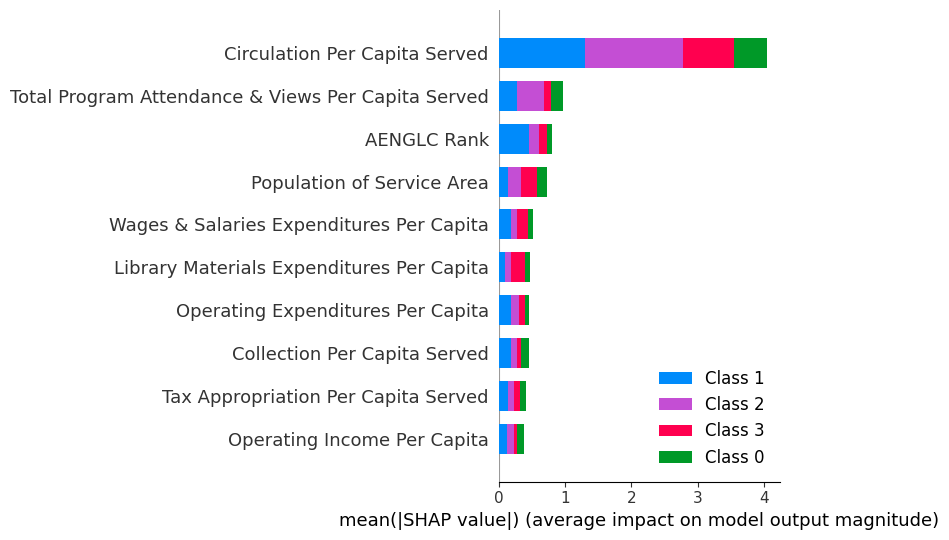

In [99]:
explainer = shap.TreeExplainer(xgb_model)

# חישוב ערכי SHAP על סט הטסט
shap_values_test = explainer.shap_values(X_test)

# גרף סיכום רגיל לכל הפיצ'רים
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_test, X_test, plot_type="bar")


<Figure size 800x600 with 0 Axes>

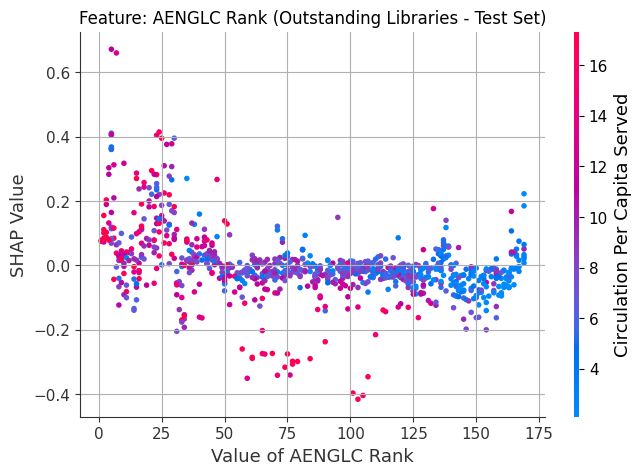

<Figure size 800x600 with 0 Axes>

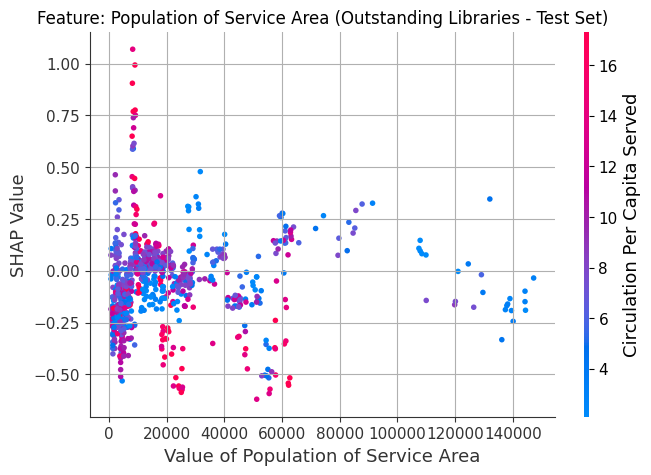

<Figure size 800x600 with 0 Axes>

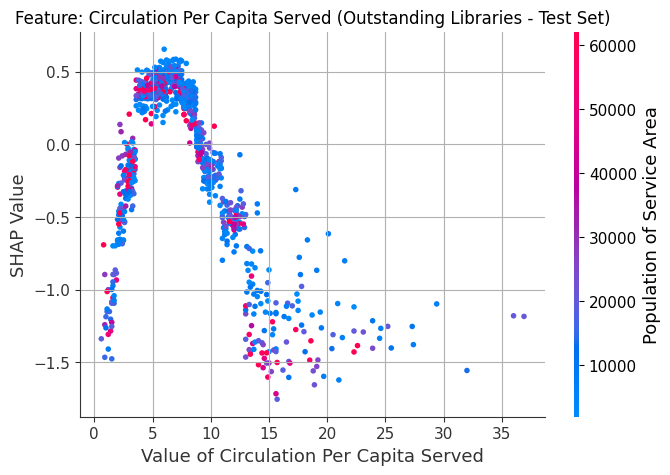

<Figure size 800x600 with 0 Axes>

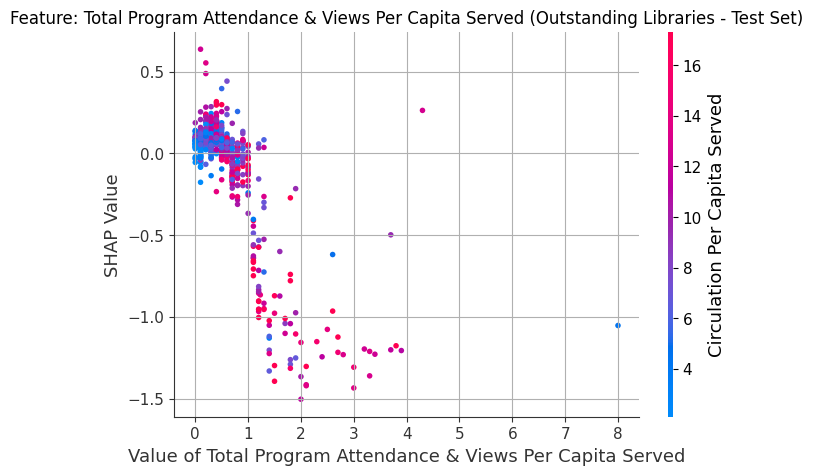

<Figure size 800x600 with 0 Axes>

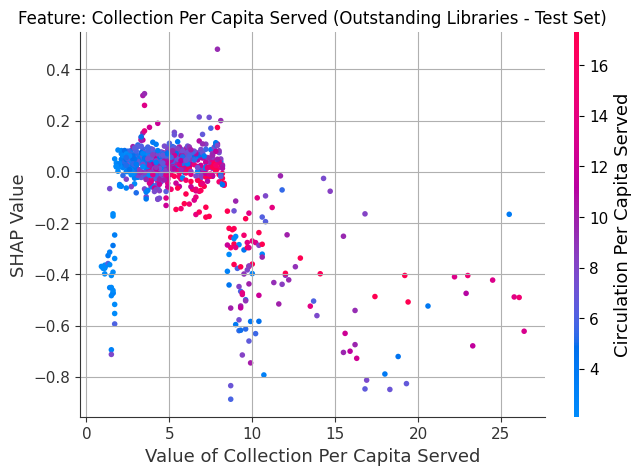

<Figure size 800x600 with 0 Axes>

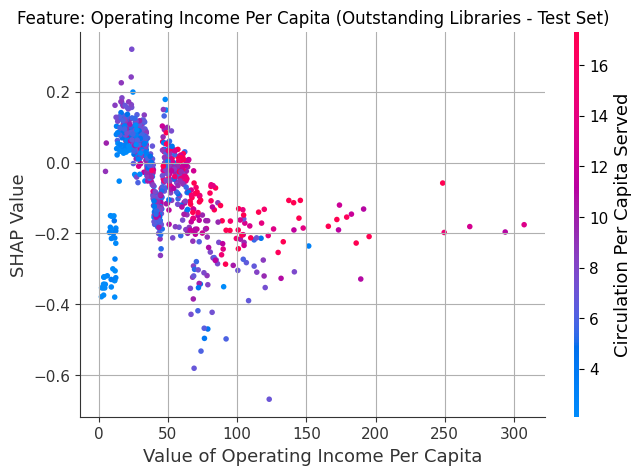

<Figure size 800x600 with 0 Axes>

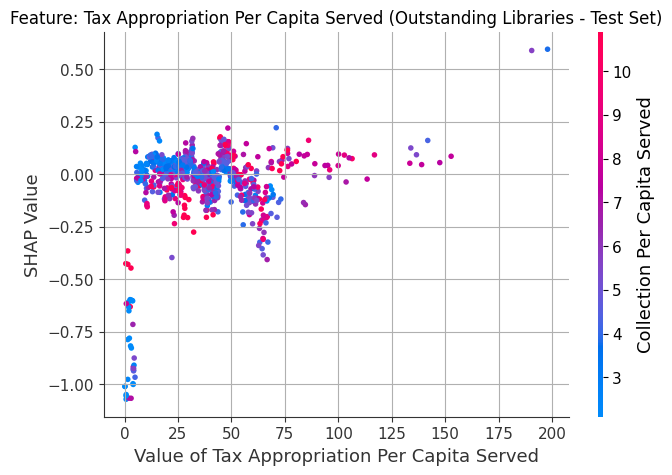

<Figure size 800x600 with 0 Axes>

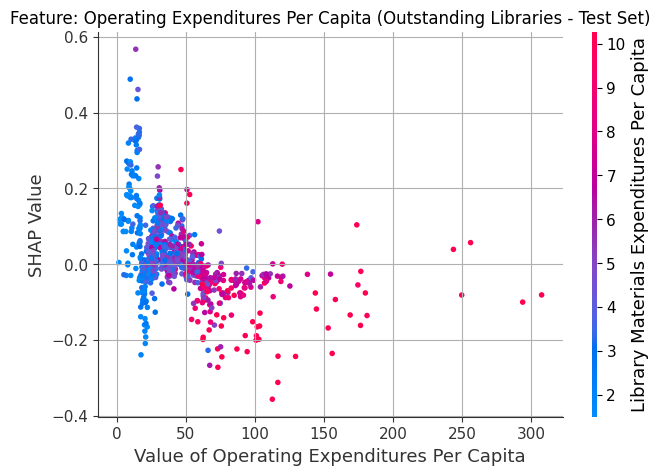

<Figure size 800x600 with 0 Axes>

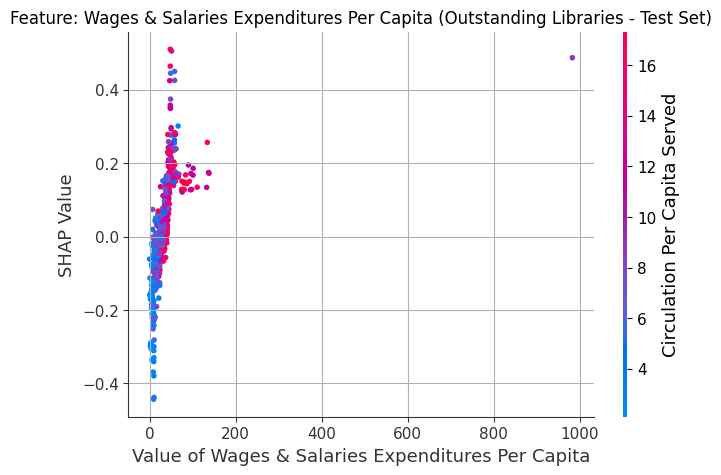

<Figure size 800x600 with 0 Axes>

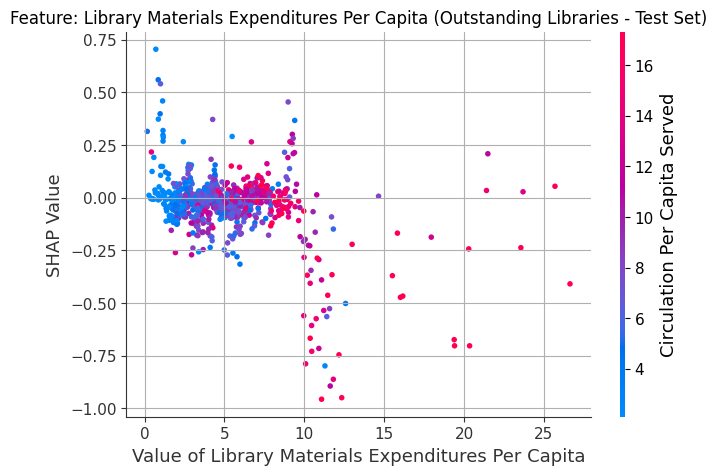

In [191]:
shap_values_class_0_test = shap_values_test[0]  # מחלקה 0

for feature_name in X_test.columns:
    plt.figure(figsize=(8, 6))
    shap.dependence_plot(feature_name, shap_values_class_0_test, X_test, show=False)
    plt.title(f"Feature: {feature_name} (Outstanding Libraries - Test Set)")
    plt.xlabel(f"Value of {feature_name}")
    plt.ylabel("SHAP Value")
    plt.grid(True)
    plt.show()
